# K-Nearst Neighbors Model

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_excel("Threshold_Data.xlsx")


In [3]:
df.dropna(inplace=True)

### One Hot Encoding

In [4]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [5]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age', 'Complain', 'Total_Spent', 'AOV']]
data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [6]:

ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)


In [7]:
data.head()

,Income,Total_Children,Response,TotalPurchases,Complain,NumWebVisitsMonth,Age,Complain,Total_Spent,AOV,Education_Graduation,Education_Master,Education_PhD,Education_n_Cycle,Marital_Status_Single,Marital_Status_Together
0,84835.0,0,1,15,0,1,54,0,1190,79.333333,1.0,0.0,0.0,0.0,1.0,0.0
1,57091.0,0,1,18,0,5,63,0,577,32.055556,1.0,0.0,0.0,0.0,1.0,0.0
2,67267.0,1,0,11,0,2,66,0,251,22.818182,1.0,0.0,0.0,0.0,0.0,0.0
3,32474.0,2,0,4,0,7,57,0,11,2.750000,1.0,0.0,0.0,0.0,0.0,1.0
4,21474.0,1,1,8,0,7,35,0,91,11.375000,1.0,0.0,0.0,0.0,1.0,0.0


# Baseline Modelling

In [8]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [9]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
X_train.dtypes

Total_Children               int64
TotalPurchases               int64
Complain                     int64
NumWebVisitsMonth            int64
Age                          int64
Complain                     int64
Total_Spent                  int64
AOV                        float64
Education_Graduation       float64
Education_Master           float64
Education_PhD              float64
Education_n_Cycle          float64
Marital_Status_Single      float64
Marital_Status_Together    float64
dtype: object

# Scaling

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
oversampler = RandomOverSampler(random_state=0)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

# K-Nearest

In [12]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))



In [13]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

auc = roc_auc_score(y_test, preds)

In [14]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7808
Precision: 0.3464
Recall: 0.5354
F1: 0.4206
AUC: 0.6795


# Figures

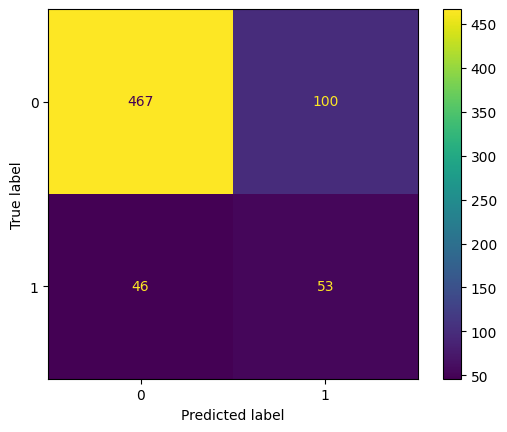

In [15]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)

cm_display.plot()
plt.show()

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has featu

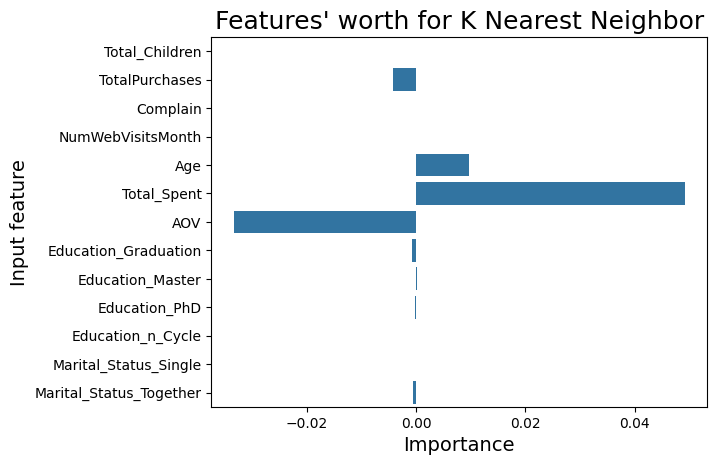

Total_Spent: 0.04914914914914921
Age: 0.009709709709709769
Education_Master: 0.00020020020020020308
Marital_Status_Single: 0.0
Education_n_Cycle: 0.0
Complain: 0.0
Complain: 0.0
Total_Children: 0.0
NumWebVisitsMonth: -5.0050050050024865e-05
Education_PhD: -0.00025025025025023534
Marital_Status_Together: -0.0006006006006005686
Education_Graduation: -0.0008008008008007531
TotalPurchases: -0.004254254254254204
AOV: -0.033383383383383335


In [16]:
pipeline = Pipeline([
    ('classifier', classifier)
])

pipeline.fit(X_train, y_train)

result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for K Nearest Neighbor", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")